In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
time_domain_features_path = './features/time_domain/'

In [3]:
def count_pt_files(directory):
    pt_files = [f for f in os.listdir(directory) if f.endswith('.pt')]
    return len(pt_files)

In [4]:
def get_pt_files(directory, ):
    pt_files = [f for f in os.listdir(directory) if f.endswith('.pt')]
    return pt_files

In [5]:
def count_pt_files(folder_path):
    return len([f for f in os.listdir(folder_path) if f.endswith('.pt')])

def read_folder_and_plot(time_domain_features_path, language='es'):
    plt.rc('font', family='Times New Roman')
    
    data_dict = {}

    for subdir in os.listdir(time_domain_features_path):
        subdir_path = os.path.join(time_domain_features_path, subdir)
        if os.path.isdir(subdir_path):
            num_pt_files = count_pt_files(subdir_path)
            data_dict[subdir] = num_pt_files
            print(f"Subfolder: {subdir}, \t\t # of files .pt: {num_pt_files}")
    
    subfolders = list(data_dict.keys())
    num_files = list(data_dict.values())
    
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_color = "#1f77b4"

    ax.bar(subfolders, num_files, color=bar_color)

    if language == 'es':
        ax.set_title('Histograma de Frecuencias de Archivos por Subcarpeta', fontsize=20, fontweight='bold', fontname='Times New Roman')
        ax.set_xlabel('Subcarpetas', fontsize=18, fontweight='bold', fontname='Times New Roman')
        ax.set_ylabel('Número de Archivos (.pt)', fontsize=18, fontweight='bold', fontname='Times New Roman')
    else:
        ax.set_title('Frequency Histogram of Files per Subfolder', fontsize=20, fontweight='bold', fontname='Times New Roman')
        ax.set_xlabel('Subfolders', fontsize=18, fontweight='bold', fontname='Times New Roman')
        ax.set_ylabel('Number of Files (.pt)', fontsize=18, fontweight='bold', fontname='Times New Roman')
    
    ax.tick_params(axis='x', rotation=90, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    plt.tight_layout()
    plt.show()


In [6]:
for subdir in os.listdir(time_domain_features_path):
    subdir_path = os.path.join(time_domain_features_path, subdir)
    if os.path.isdir(subdir_path):
        num_pt_files = count_pt_files(subdir_path)
        print(f"Subfolder: {subdir}, \t\t # of files .pt: {num_pt_files}")

Subfolder: chew, 		 # of files .pt: 5879
Subfolder: chew_elec, 		 # of files .pt: 138
Subfolder: chew_musc, 		 # of files .pt: 218
Subfolder: eeg, 		 # of files .pt: 9603
Subfolder: elec, 		 # of files .pt: 30159
Subfolder: elpp, 		 # of files .pt: 172
Subfolder: eyem, 		 # of files .pt: 38254
Subfolder: eyem_chew, 		 # of files .pt: 830
Subfolder: eyem_elec, 		 # of files .pt: 2306
Subfolder: eyem_musc, 		 # of files .pt: 18400
Subfolder: eyem_shiv, 		 # of files .pt: 41
Subfolder: musc, 		 # of files .pt: 45928
Subfolder: musc_elec, 		 # of files .pt: 7083
Subfolder: shiv, 		 # of files .pt: 550
Subfolder: shiv_elec, 		 # of files .pt: 1


Subfolder: chew, 		 # of files .pt: 5879
Subfolder: chew_elec, 		 # of files .pt: 138
Subfolder: chew_musc, 		 # of files .pt: 218
Subfolder: eeg, 		 # of files .pt: 9603
Subfolder: elec, 		 # of files .pt: 30159
Subfolder: elpp, 		 # of files .pt: 172
Subfolder: eyem, 		 # of files .pt: 38254
Subfolder: eyem_chew, 		 # of files .pt: 830
Subfolder: eyem_elec, 		 # of files .pt: 2306
Subfolder: eyem_musc, 		 # of files .pt: 18400
Subfolder: eyem_shiv, 		 # of files .pt: 41
Subfolder: musc, 		 # of files .pt: 45928
Subfolder: musc_elec, 		 # of files .pt: 7083
Subfolder: shiv, 		 # of files .pt: 550
Subfolder: shiv_elec, 		 # of files .pt: 1


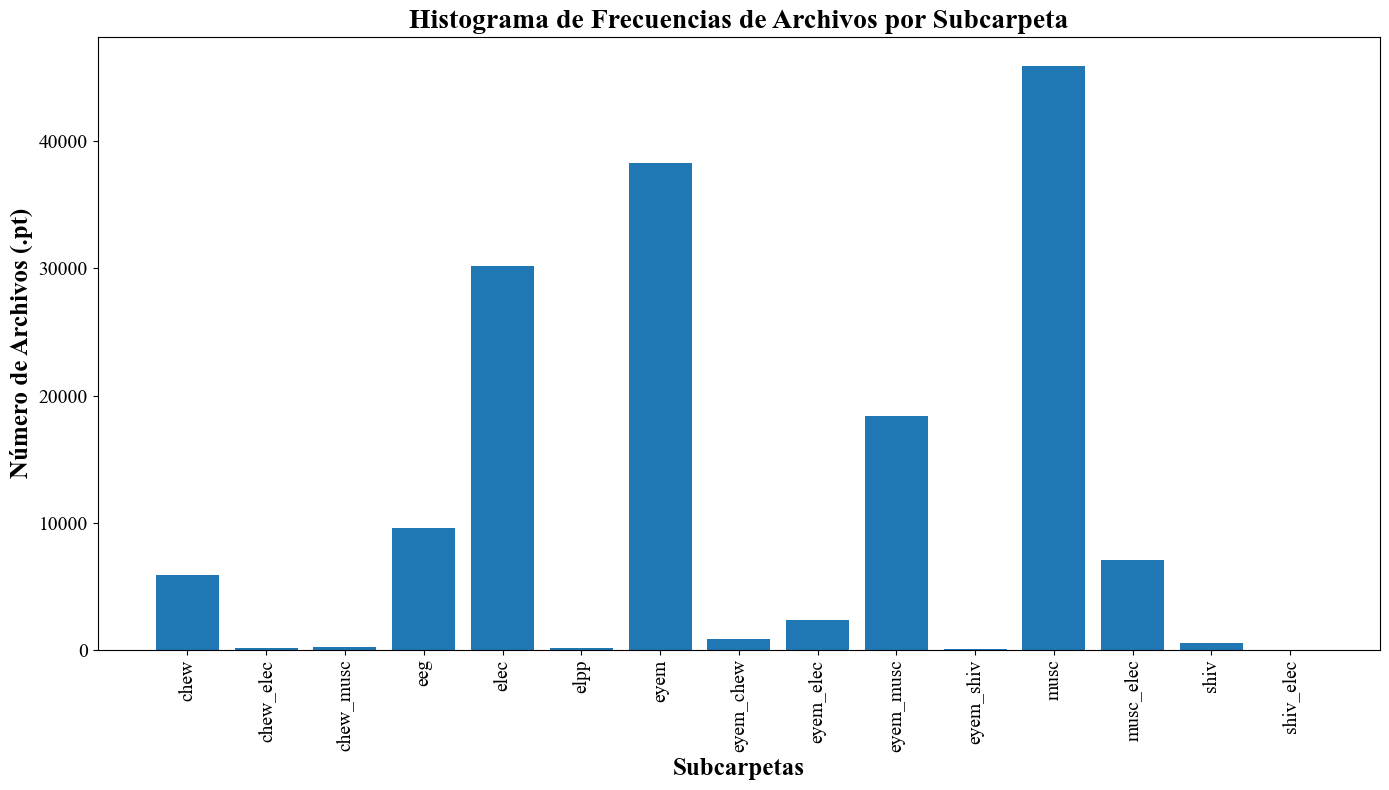

In [7]:
read_folder_and_plot(time_domain_features_path, language='es')

In [8]:
subfolders_allowed = ["chew", "elpp", "eyem", "musc", "shiv", "eeg"]

In [9]:
def duration_in_seconds(data):
    total_duration = len(data) / sample_rate
    #print(f"Total Duration: {total_duration:.2f} seconds")
    return total_duration

In [10]:
sample_rate = 512
eeg_files_with_artifacts = []
for subdir in subfolders_allowed:
    subdir_path = os.path.join(time_domain_features_path, subdir)
    if os.path.isdir(subdir_path):
        pt_files = get_pt_files(subdir_path)
        num_pt_files = len(pt_files)
        #print(f"Subfolder: {subdir}, \t\t # of files .pt: {num_pt_files}")
        for file in pt_files:
            file_path = os.path.join(subdir_path, file)
            #print(f"File processing: {file_path}")
            eeg_files_with_artifacts.append(file_path)
            #duration_in_seconds(torch.load(file_path))

In [11]:
def eeg_plot(data_path, sample_rate=512, duration=None, color="#0000FF", language='es'):
    plt.rc('font', family='Times New Roman')
    
    data = torch.load(data_path, weights_only=False)
    data = data.numpy() if isinstance(data, torch.Tensor) else np.array(data)
    print(data.shape)
    total_duration = len(data) / sample_rate
    print(f"Total Duration: {total_duration:.4f} seconds")

    if duration is not None:
        num_samples = int(duration * sample_rate)
        data = data[:num_samples]

    time = np.arange(len(data)) / sample_rate

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

    axs[0].plot(time, data, color=color)
    if language == 'es':
        axs[0].set_xlabel('Tiempo (s)', fontsize=16, fontweight='bold', fontname='Times New Roman')
        axs[0].set_ylabel('Amplitud', fontsize=16, fontweight='bold', fontname='Times New Roman')
        axs[0].set_title('Segmento de Artefacto', fontsize=18, fontweight='bold', fontname='Times New Roman')
    else:
        axs[0].set_xlabel('Time (s)', fontsize=16, fontweight='bold', fontname='Times New Roman')
        axs[0].set_ylabel('Amplitude', fontsize=16, fontweight='bold', fontname='Times New Roman')
        axs[0].set_title('Artifact Segment', fontsize=18, fontweight='bold', fontname='Times New Roman')

    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axs[0].tick_params(axis='x', labelsize=14)
    axs[0].tick_params(axis='y', labelsize=14)

    axs[1].specgram(data, Fs=sample_rate, cmap='inferno')
    if language == 'es':
        axs[1].set_xlabel('Tiempo (s)', fontsize=24, fontweight='bold', fontname='Times New Roman')
        axs[1].set_ylabel('Frecuencia (Hz)', fontsize=24, fontweight='bold', fontname='Times New Roman')
        axs[1].set_title('Espectrograma', fontsize=24, fontweight='bold', fontname='Times New Roman')
    else:
        axs[1].set_xlabel('Time (s)', fontsize=24, fontweight='bold', fontname='Times New Roman')
        axs[1].set_ylabel('Frequency (Hz)', fontsize=24, fontweight='bold', fontname='Times New Roman')
        axs[1].set_title('Spectrogram', fontsize=24, fontweight='bold', fontname='Times New Roman')
        
    axs[1].tick_params(axis='x', labelsize=24)
    axs[1].tick_params(axis='y', labelsize=24)

    plt.tight_layout()
    plt.show()

In [16]:
import torch
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

def eeg_plot(data_path, sample_rate=512, duration=None, color="#0000FF", language='es'):
    plt.rc('font', family='Times New Roman')
    
    data = torch.load(data_path, weights_only=False)
    data = data.numpy() if isinstance(data, torch.Tensor) else np.array(data)
    total_duration = len(data) / sample_rate
    print(f"Total Duration: {total_duration:.4f} seconds")

    if duration is not None:
        num_samples = int(duration * sample_rate)
        data = data[:num_samples]

    time = np.arange(len(data)) / sample_rate

    nperseg  = 128
    noverlap = 64
    
    f, t, Sxx = spectrogram(
        data,
        fs=sample_rate,
        nperseg=nperseg,
        noverlap=noverlap,
        scaling='density',
        mode='psd'
    )

    Sxx_dB = 10 * np.log10(Sxx + 1e-12)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

    axs[0].plot(time, data, color=color)
    if language == 'es':
        axs[0].set_xlabel('Tiempo (s)', fontsize=40, fontweight='bold')
        axs[0].set_ylabel('Amplitud', fontsize=40, fontweight='bold')
        axs[0].set_title('Segmento de Artefacto', fontsize=40, fontweight='bold')
    else:
        axs[0].set_xlabel('Time (s)', fontsize=40, fontweight='bold')
        axs[0].set_ylabel('Amplitude', fontsize=40, fontweight='bold')
        axs[0].set_title('Artifact Segment', fontsize=40, fontweight='bold')
    axs[0].tick_params(axis='both', labelsize=40)
    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    pcm = axs[1].pcolormesh(t, f, Sxx_dB, shading='gouraud', cmap='inferno')
    if language == 'es':
        axs[1].set_xlabel('Tiempo (s)', fontsize=40, fontweight='bold')
        axs[1].set_ylabel('Frecuencia (Hz)', fontsize=40, fontweight='bold')
        axs[1].set_title('Espectrograma', fontsize=40, fontweight='bold')
    else:
        axs[1].set_xlabel('Time (s)', fontsize=40, fontweight='bold')
        axs[1].set_ylabel('Frequency (Hz)', fontsize=40, fontweight='bold')
        axs[1].set_title('Spectrogram', fontsize=40, fontweight='bold')
    axs[1].tick_params(axis='both', labelsize=40)

    cbar = fig.colorbar(pcm, ax=axs[1], pad=0.02)
    cbar.ax.tick_params(labelsize=18)

    plt.tight_layout()
    plt.show()

Total Duration: 9.7656 seconds


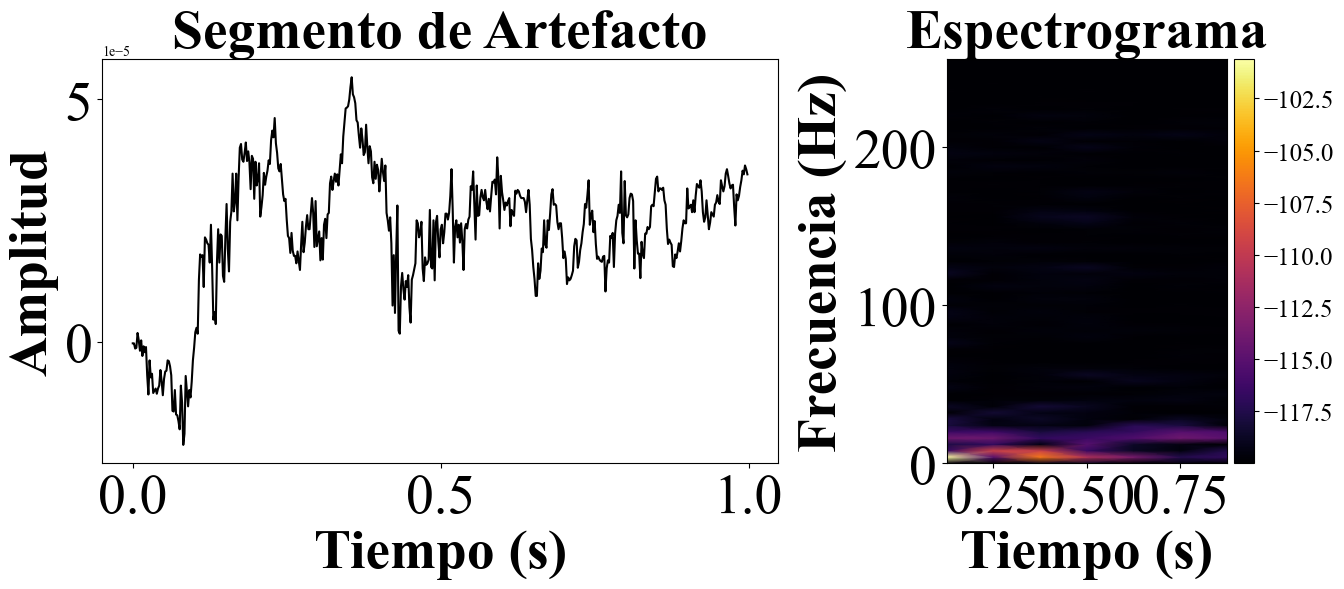

Total Duration: 9.7656 seconds


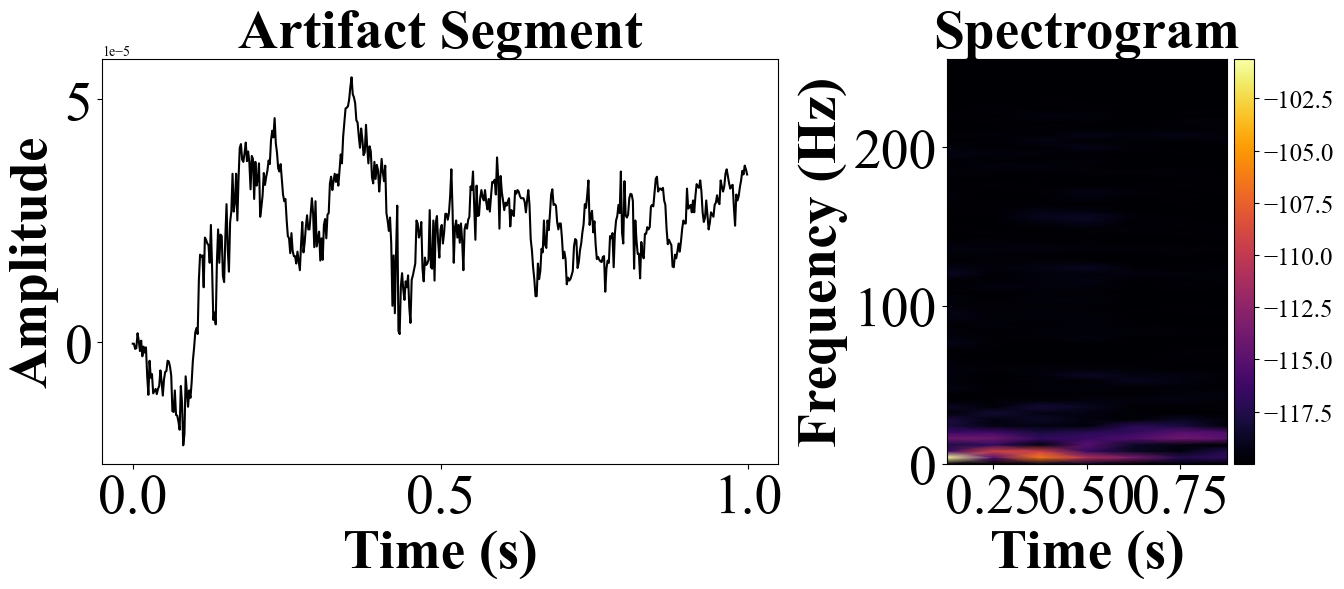

In [17]:
eeg_plot('./features/time_domain/eeg/random_C3_100940_105940_214.pt', 512, 1, '#000000', language='es')
eeg_plot('./features/time_domain/eeg/random_C3_100940_105940_214.pt', 512, 1, '#000000', language='en')

Total Duration: 10.5020 seconds


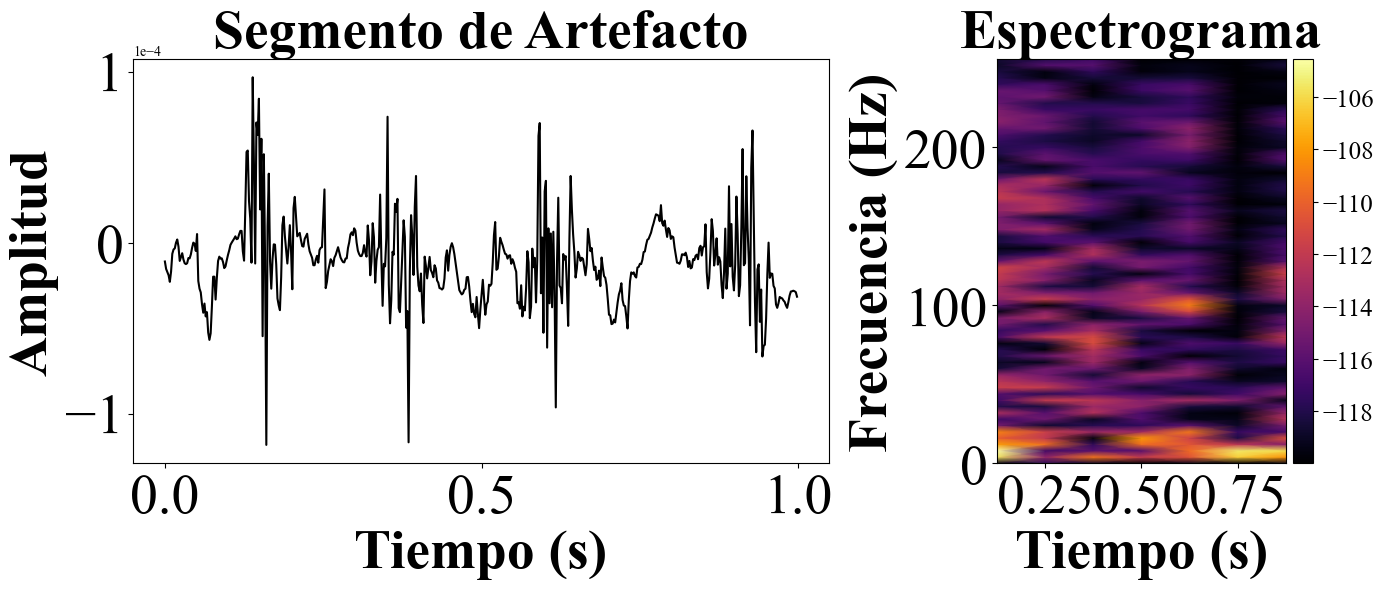

Total Duration: 10.5020 seconds


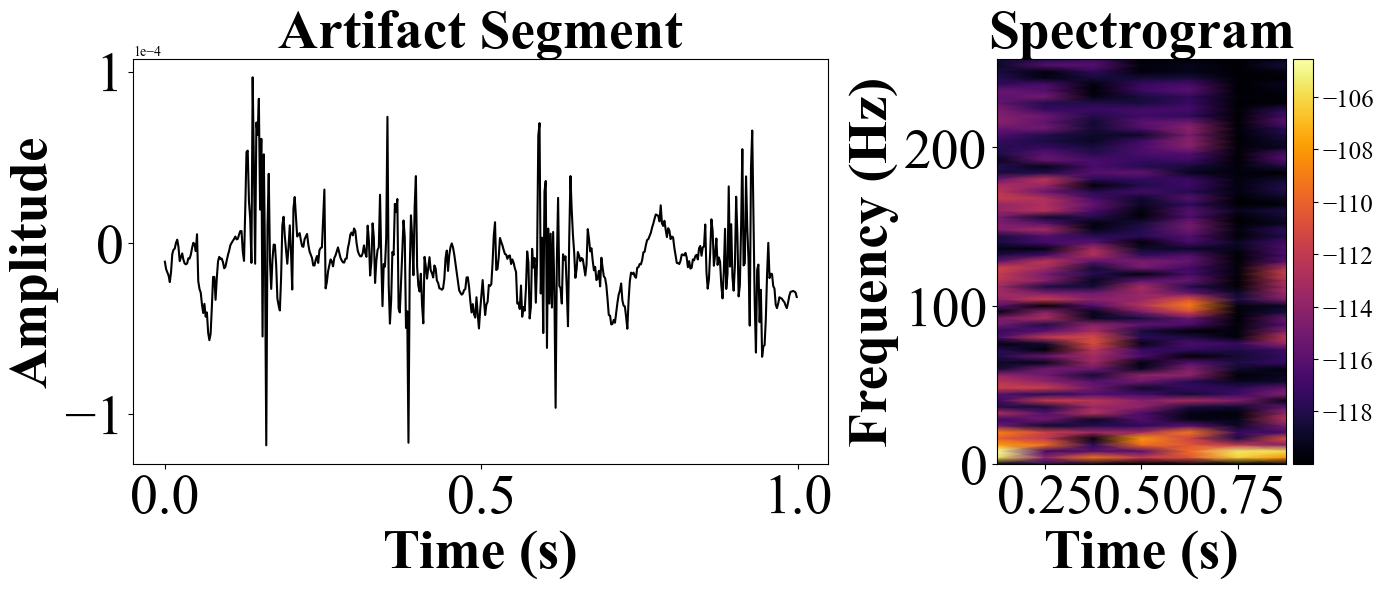

In [18]:
eeg_plot('./features/time_domain/chew/C3-CZ_0.0_21.0048.pt', 512, 1, '#000000', language='es')
eeg_plot('./features/time_domain/chew/C3-CZ_0.0_21.0048.pt', 512, 1, '#000000', language='en')

Total Duration: 0.5039 seconds


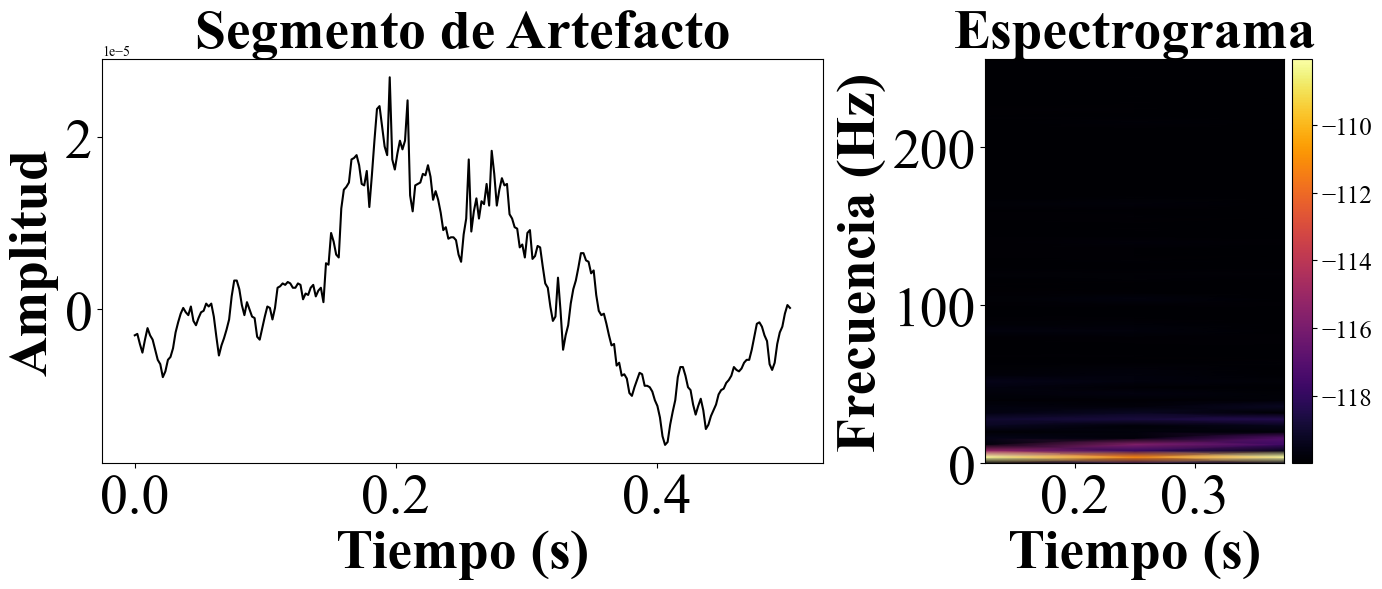

Total Duration: 0.5039 seconds


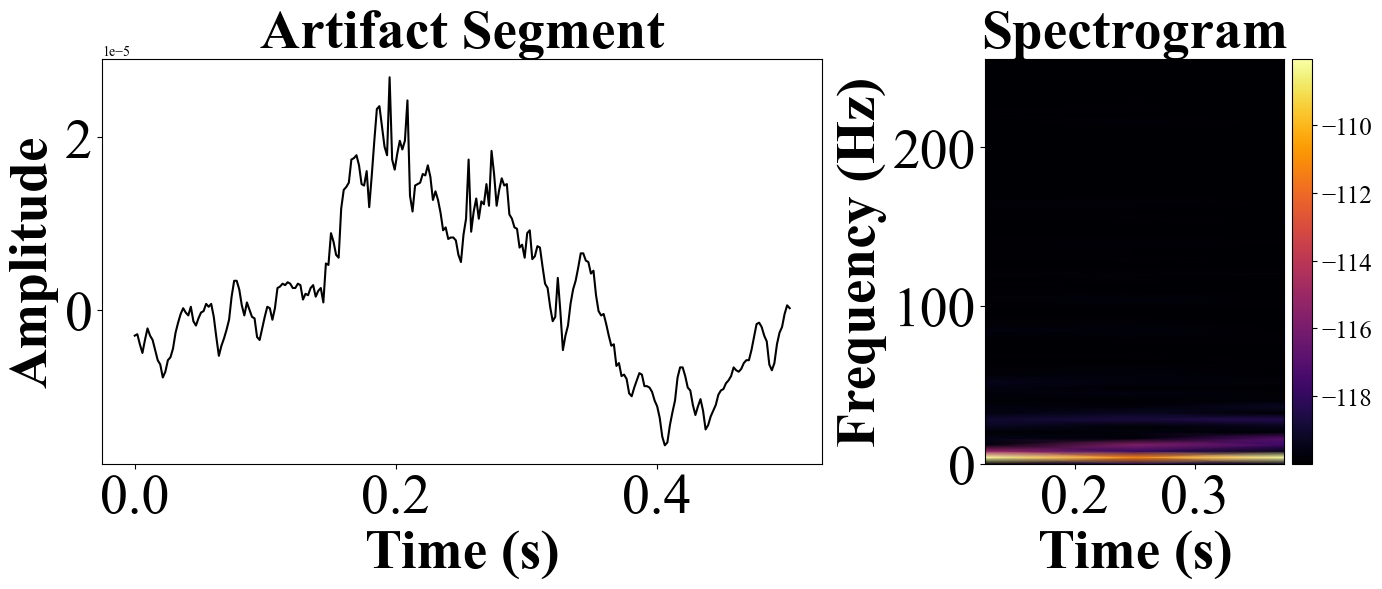

In [19]:
eeg_plot('./features/time_domain/elpp/C3-CZ_221.9828_222.9905.pt', 512, 1, '#000000', language='es')
eeg_plot('./features/time_domain/elpp/C3-CZ_221.9828_222.9905.pt', 512, 1, '#000000', language='en')

Total Duration: 11.2598 seconds


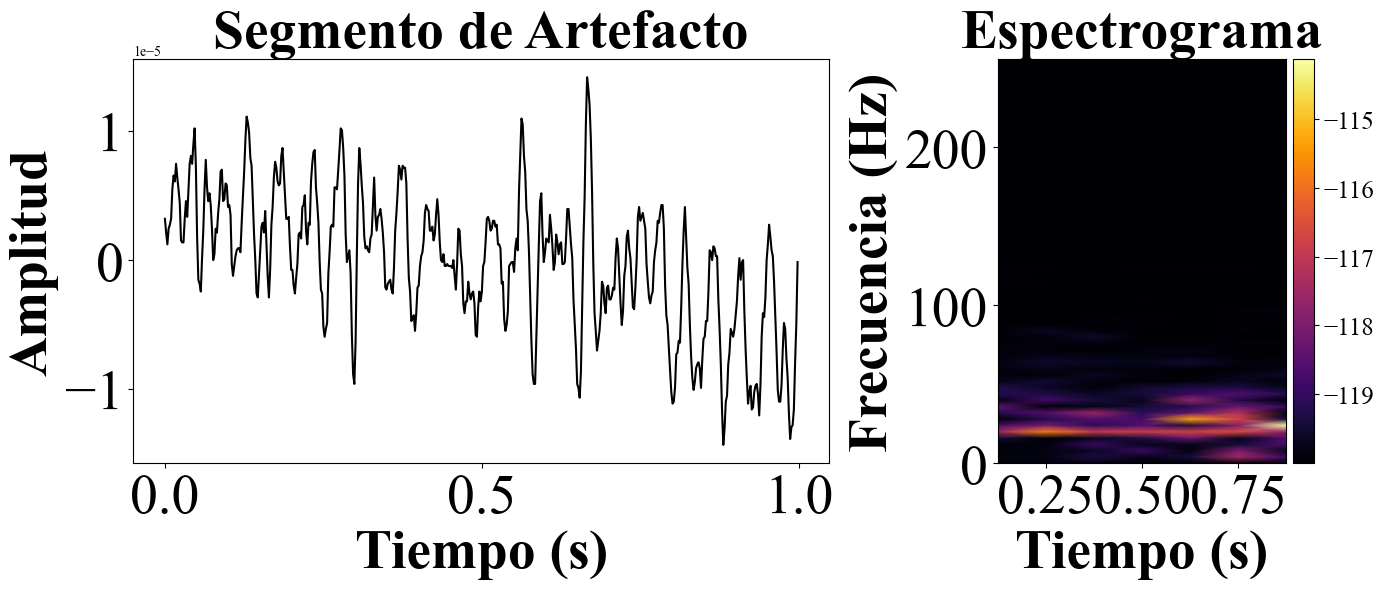

Total Duration: 11.2598 seconds


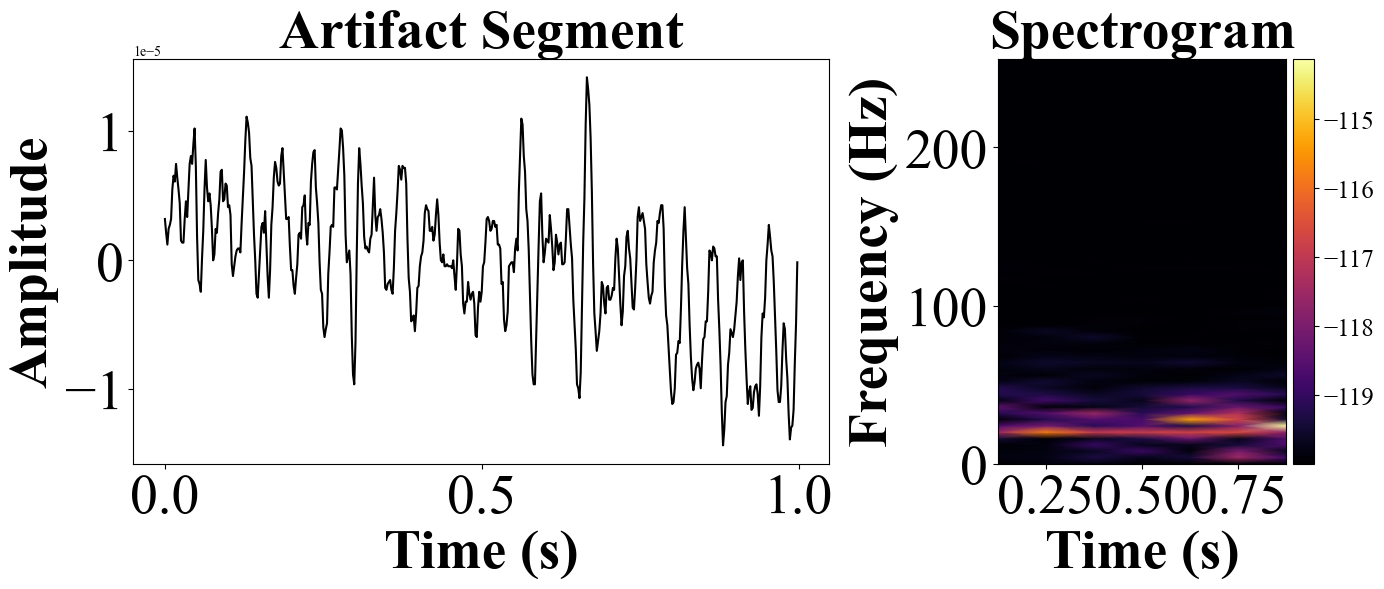

In [20]:
eeg_plot("./features/time_domain/eyem/C3-CZ_0.0_23.0622.pt", 512, 1, '#000000', language='es')
eeg_plot("./features/time_domain/eyem/C3-CZ_0.0_23.0622.pt", 512, 1, '#000000', language='en')

Total Duration: 0.9902 seconds


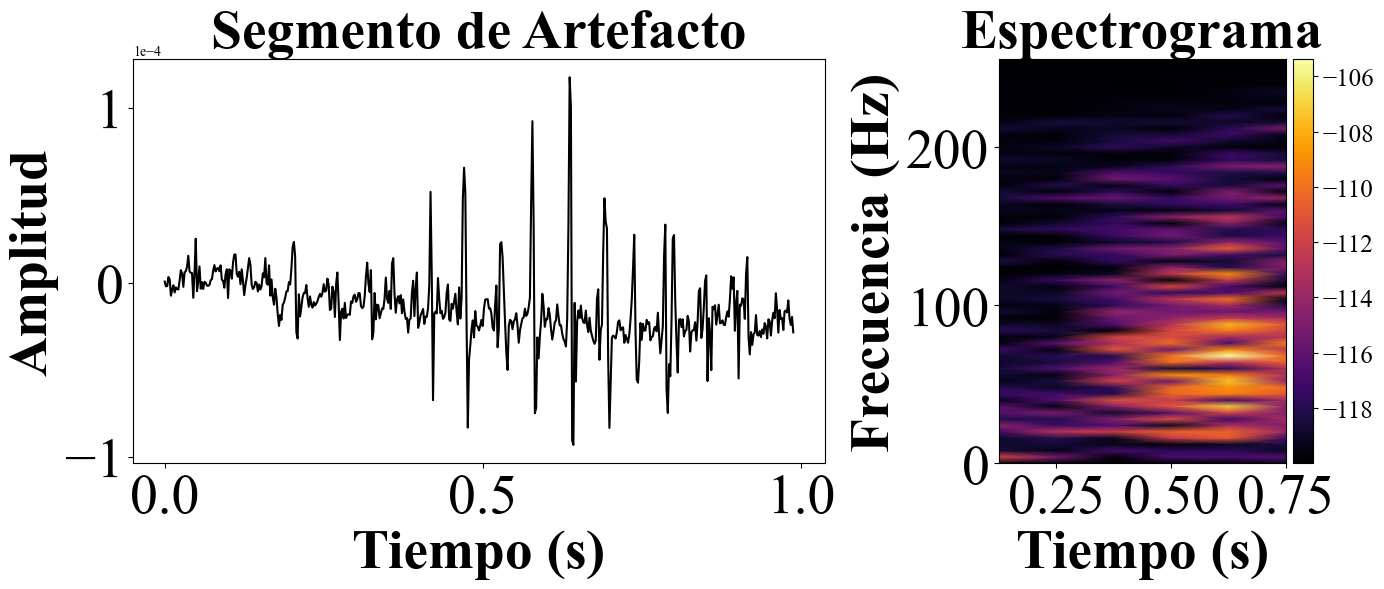

Total Duration: 0.9902 seconds


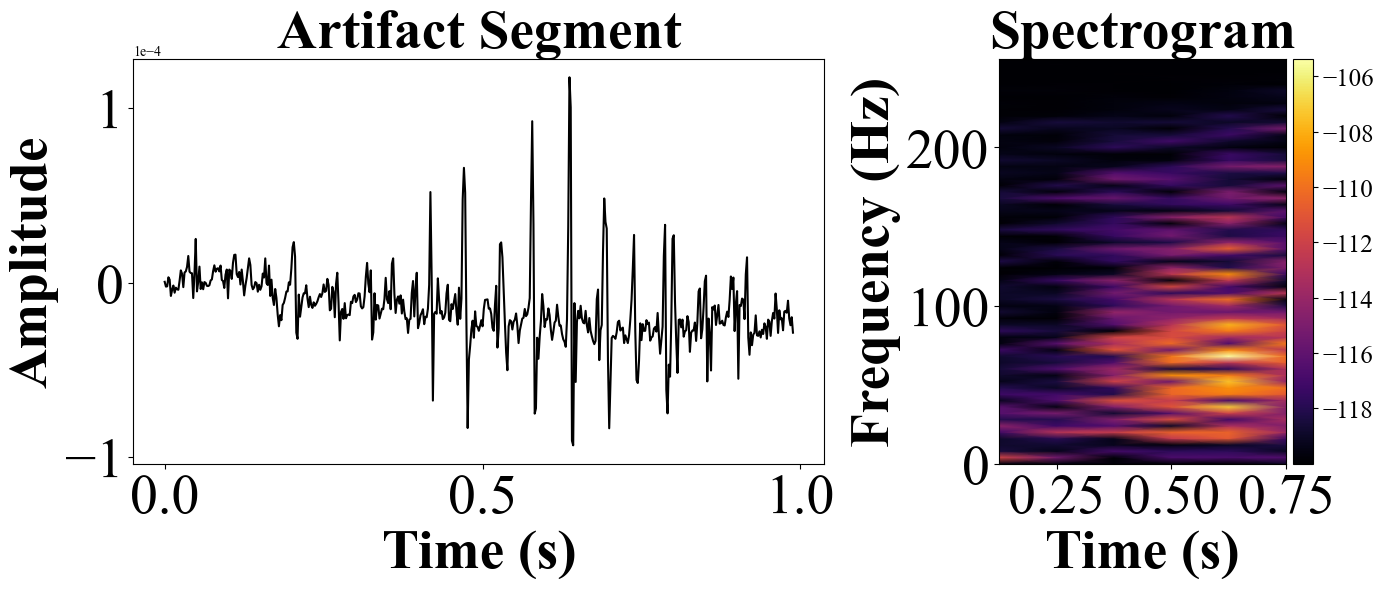

In [21]:
eeg_plot("./features/time_domain/shiv/C3-CZ_156.9325_158.9624.pt", 512, 1, '#000000', language='es')
eeg_plot("./features/time_domain/shiv/C3-CZ_156.9325_158.9624.pt", 512, 1, '#000000', language='en')

Total Duration: 127.7500 seconds


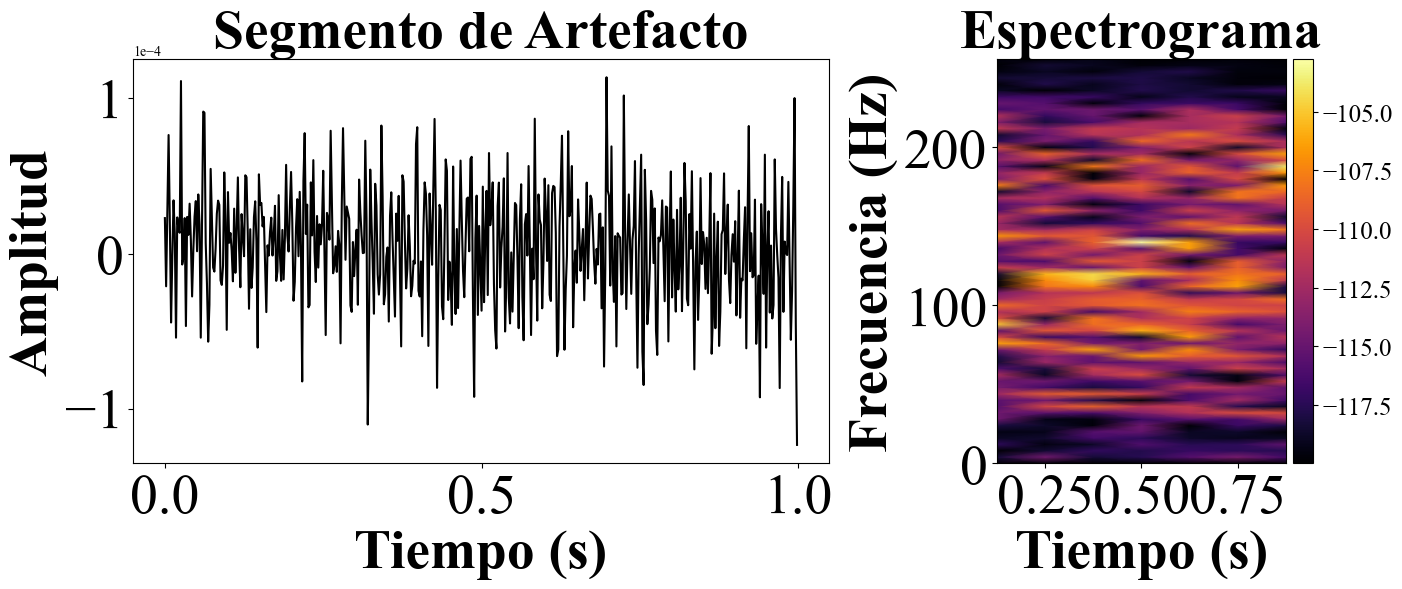

Total Duration: 127.7500 seconds


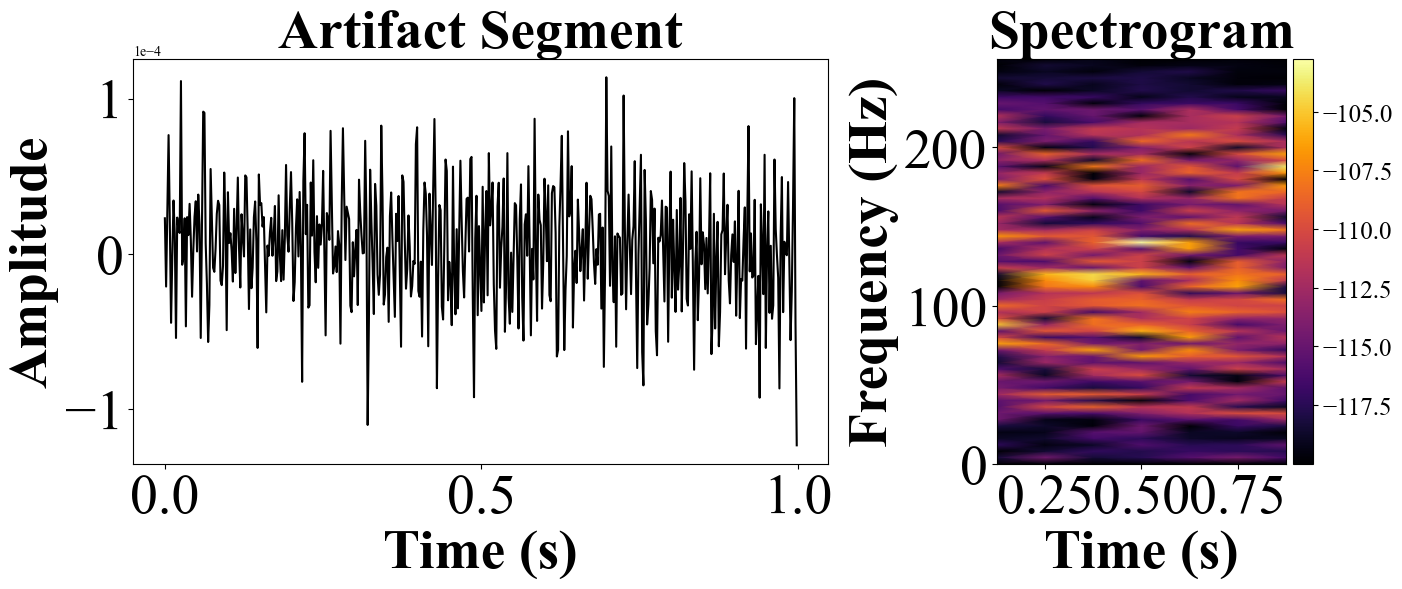

In [22]:
eeg_plot("./features/time_domain/musc/C3-CZ_0.0_261.6348.pt", 512, 1, '#000000', language='es')
eeg_plot("./features/time_domain/musc/C3-CZ_0.0_261.6348.pt", 512, 1, '#000000', language='en')

In [19]:
len(eeg_files_with_artifacts)

100386

In [17]:
def pad_or_cut_signal(data, target_length):
    current_length = len(data)
    if current_length > target_length:
        return data[:target_length]
    elif current_length < target_length:
        return np.pad(data, (0, target_length - current_length), mode='constant', constant_values=0)
    else:
        return data

In [18]:
import glob

In [19]:
sample_rate = 512
target_duration = 1
target_length = target_duration * sample_rate

for artifact in eeg_files_with_artifacts:
    data = torch.load(artifact, weights_only=False)
    if duration_in_seconds(data) > target_duration:
        if 'chew' in artifact or 'eyem' in artifact or 'musc' in artifact:
            data = pad_or_cut_signal(data, target_length)
            print(data.shape)
            new_path = artifact.replace('time_domain', 'time_domain_win_cut_pad')
            new_dir = os.path.dirname(new_path)
            os.makedirs(new_dir, exist_ok=True)
            torch.save(data, new_path)
            #print(new_path)

(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)

KeyboardInterrupt: 

In [22]:
sample_rate = 512
target_duration = 1
target_length = target_duration * sample_rate

artifacts_root  = './features/time_domain'
artifact_paths = glob.glob(f"{artifacts_root}/**/*.pt", recursive=True)

for artifact in artifact_paths:
    # 2) Solo procesar si 'eeg' está en la ruta
    if 'eeg' not in artifact:
        continue

    data = torch.load(artifact, weights_only=False)
    # 3) Comprueba duración y procesa
    if duration_in_seconds(data) > target_duration:
        processed = pad_or_cut_signal(data, target_length)

        # 4) Guarda en nueva carpeta
        new_path = artifact.replace('time_domain', 'time_domain_win_cut_pad')
        os.makedirs(os.path.dirname(new_path), exist_ok=True)
        
        print(processed.shape)
        torch.save(processed, new_path)

(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)

In [ ]:
def pad_signal(data, target_length):
    current_length = len(data)
    if current_length >= target_length:
        return data

    repeat_factor = -(-target_length // current_length)
    padded_data = np.tile(data, repeat_factor)[:target_length]
    return padded_data

In [ ]:
def sliding_windows(data, window_size, overlap=0.25):
    step_size = int(window_size * (1 - overlap))
    windows = [data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)]
    return windows

In [ ]:
sample_rate = 512
segment_length = sample_rate  

for artifact in eeg_files_with_artifacts:
    if 'shiv' in artifact or 'elpp' in artifact:
        print(f"Processing: {artifact}")
        
        data = torch.load(artifact, weights_only=False)
        data = data.numpy() if isinstance(data, torch.Tensor) else np.array(data)
        
        duration_sec = len(data) / sample_rate
        rounded_duration = int(np.ceil(duration_sec))
        target_length = rounded_duration * sample_rate
        padded_data = pad_signal(data, target_length)
        
        segments = sliding_windows(padded_data, segment_length, overlap=0.25)

        new_path_base = artifact.replace('time_domain', 'time_domain_win_cut_pad')
        new_dir = os.path.dirname(new_path_base)
        os.makedirs(new_dir, exist_ok=True)

        for i, segment in enumerate(segments):
            segment_path = f"{new_path_base}_part{i+1}.pt"
            torch.save(segment, segment_path)
            print(f"Saved segment {i+1} at: {segment_path}")

In [ ]:
EEG_ALL_EPOCHS = 'data/EEG_all_epochs.npy'

sample_rate = 512
segment_length = sample_rate
overlap = 0.25

In [ ]:
import numpy as np

EEG_ALL_EPOCHS = 'data/EEG_all_epochs.npy'

# Load the data
data = np.load(EEG_ALL_EPOCHS)

# Print the shape of the data
print(f"The shape of the data is: {data.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eeg_plot(data_path, row_index=0, sample_rate=512, language='es'):
    plt.rcParams['font.family'] = 'Times New Roman'
    
    data = np.load(data_path)
    
    if row_index >= data.shape[0]:
        print(f"Warning: The file only contains {data.shape[0]} rows. Plotting the first row instead.")
        row_index = 0
    
    eeg_data = data[row_index, :]
    
    eeg_data = eeg_data / 1e6
    
    time = np.linspace(0, 1, 512)
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

    axs[0].plot(time, eeg_data, color="black")
    if language == 'es':
        axs[0].set_xlabel('Tiempo (s)', fontsize=16, fontweight='bold')
        axs[0].set_ylabel('Amplitud (μV)', fontsize=16, fontweight='bold')
        axs[0].set_title('Señal de EEG', fontsize=18, fontweight='bold')
    else:
        axs[0].set_xlabel('Time (s)', fontsize=16, fontweight='bold')
        axs[0].set_ylabel('Amplitude', fontsize=16, fontweight='bold')
        axs[0].set_title('EEG Signal', fontsize=18, fontweight='bold')

    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axs[0].tick_params(axis='x', labelsize=14)
    axs[0].tick_params(axis='y', labelsize=14)

    axs[1].specgram(eeg_data, Fs=sample_rate, cmap='inferno')
    if language == 'es':
        axs[1].set_xlabel('Tiempo (s)', fontsize=16, fontweight='bold')
        axs[1].set_ylabel('Frecuencia (Hz)', fontsize=16, fontweight='bold')
        axs[1].set_title('Espectrograma', fontsize=18, fontweight='bold')
    else:
        axs[1].set_xlabel('Time (s)', fontsize=16, fontweight='bold')
        axs[1].set_ylabel('Frequency (Hz)', fontsize=16, fontweight='bold')
        axs[1].set_title('Spectrogram', fontsize=18, fontweight='bold')
        
    axs[1].tick_params(axis='x', labelsize=14)
    axs[1].tick_params(axis='y', labelsize=14)

    plt.tight_layout()
    plt.show()

EEG_ALL_EPOCHS = 'data/EEG_all_epochs.npy'
eeg_plot(EEG_ALL_EPOCHS, row_index=100, language='en')

In [ ]:
if os.path.exists(EEG_ALL_EPOCHS):
    print(f"Loading EEG data from: {EEG_ALL_EPOCHS}")
    eeg_data = np.load(EEG_ALL_EPOCHS, allow_pickle=True)
else:
    raise FileNotFoundError(f"File {EEG_ALL_EPOCHS} not found.")

output_dir = 'features/time_domain_win_cut_pad/eeg'
os.makedirs(output_dir, exist_ok=True)

def pad_signal(signal, target_length):
    pad_size = target_length - len(signal)
    if pad_size > 0:
        return np.pad(signal, (0, pad_size), mode='constant')
    return signal

def sliding_windows(signal, window_size, overlap):
    step = int(window_size * (1 - overlap))
    segments = [signal[i:i + window_size] for i in range(0, len(signal) - window_size + 1, step)]
    return segments

for epoch_idx, epoch in enumerate(eeg_data):
    print(f"Processing Epoch {epoch_idx + 1}/{len(eeg_data)}")
    epoch = np.array(epoch)

    duration_sec = len(epoch) / sample_rate
    rounded_duration = int(np.ceil(duration_sec))
    target_length = rounded_duration * sample_rate
    padded_epoch = pad_signal(epoch, target_length)

    segments = sliding_windows(padded_epoch, segment_length, overlap)

    for i, segment in enumerate(segments):
        segment_path = os.path.join(output_dir, f"epoch{epoch_idx+1}_part{i+1}.pt")
        torch.save(segment, segment_path)
        print(f"Saved segment {i+1} of epoch {epoch_idx+1} at: {segment_path}")

print("Processing complete.")